# PYBER RIDE SHARING ANALYSIS

Pyber Data Analysis

Urban cities has the most rides and drivers per city but has a lower fare on average compared to other city types.

Rural riders spend the most on fares but use the ride sharing service the least.

Suburban cities has less than 20% of all driver counts, but still make up more than 25% of the total fares and rides produced.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
citydata_file = "generated_data/city_data.csv"
citydata = pd.read_csv(citydata_file)

ridedata_file = "generated_data/ride_data.csv"
ridedata = pd.read_csv(ridedata_file)

In [3]:
#count the number of rides per city
ride_count = pd.DataFrame(ridedata["city"].value_counts())
ride_count = ride_count.reset_index()
ride_count = ride_count.rename(columns={"index":"city", "city":"ride count"})

In [4]:
#total fares per city
fares = pd.DataFrame(ridedata.groupby("city")["fare"].sum())
fares = fares.reset_index()
fares = fares.rename(columns={"fare":"total fare"})

In [5]:
#Merge ride count with total fare
newride = pd.merge(ride_count,fares)

In [6]:
#calculate average fare and merge with previous table
avgfare = pd.DataFrame(newride["total fare"]/newride["ride count"],columns=['average fare'])
newride_data = pd.merge(newride,avgfare, how='outer',left_index=True,right_index=True)
newride_data = newride_data.round(1)

# RIDE SHARING TABLE

In [7]:
#merge new ride data with city data for graphs
citynride = pd.merge(newride_data,citydata, how='inner')
citynride.head()

,city,ride count,total fare,average fare,driver_count,type
0,North Audreyfort,37,874.2,23.6,36,Urban
1,East Karenmouth,35,832.2,23.8,46,Urban
2,Alexisfort,33,903.1,27.4,24,Urban
3,Mathewfurt,33,842.1,25.5,3,Urban
4,Port Meghanton,32,712.9,22.3,22,Urban


In [8]:
#create tables for each city type
urban = citynride.query('type == "Urban"')
suburban = citynride.query('type == "Suburban"')
rural = citynride.query('type == "Rural"')

#create series array for scatter plot
urbanx = np.array(urban['ride count'])
urbany = np.array(urban['average fare'])
urbans = np.array(urban['driver_count'])

suburbanx = np.array(suburban['ride count'])
suburbany = np.array(suburban['average fare'])
suburbans = np.array(suburban['driver_count'])

ruralx = np.array(rural['ride count'])
ruraly = np.array(rural['average fare'])
rurals = np.array(rural['driver_count'])

# BUBBLE PLOT FOR RIDE SHARING DATA

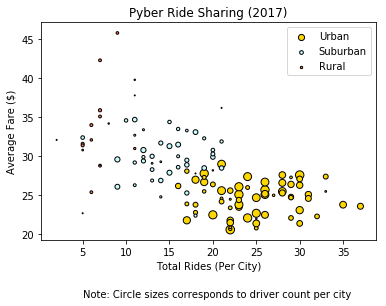

In [23]:
#Create scatter plot data points
up = plt.scatter(urbanx, urbany, s=urbans, c='gold',  edgecolors="black", label='Urban')
sp = plt.scatter(suburbanx, suburbany, s=suburbans, c='xkcd:light sky blue',  edgecolors="black", label='Suburban')
rp = plt.scatter(ruralx, ruraly, s=rurals, c='xkcd:pinkish orange',  edgecolors="black", label='Rural')

# Create a title, x label, y label and legend for chart
plt.title("Pyber Ride Sharing (2017)")
plt.xlabel("Total Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(handles=[up, sp, rp], loc="best")
plt.text(5,12,"Note: Circle sizes corresponds to driver count per city")

plt.savefig("Pyberchart.png")
plt.show()

# TOTAL FARES BY CITY TYPE

In [10]:
#calculate total fare of all rides
totfare = newride['total fare'].sum()

#calculate fare percentage by city type
totf1 = (urban['total fare'].sum()/totfare)*100
totf2 = (suburban['total fare'].sum()/totfare)*100
totf3 = (rural['total fare'].sum()/totfare)*100

#values for chart
totfare_citytype = [totf1,totf2,totf3]

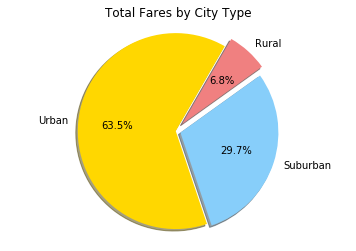

In [11]:
citylabels = ["Urban", "Suburban", "Rural"]
colors = ["gold","lightskyblue", "lightcoral"]
explode = (0, 0.05, 0.1)

plt.pie(totfare_citytype, explode=explode, labels=citylabels, colors=colors,
        autopct="%1.1f%%",startangle=60, shadow=True)
plt.title("Total Fares by City Type")
plt.axis("equal")
plt.show()

# TOTAL RIDES BY CITY TYPE

In [12]:
#calculate total count of all rides
totrides = newride['ride count'].sum()

#calculate ride percentage by city type
totr1 = (urban['ride count'].sum()/totrides)*100
totr2 = (suburban['ride count'].sum()/totrides)*100
totr3 = (rural['ride count'].sum()/totrides)*100

#values for chart
totrides_citytype = [totr1,totr2,totr3]

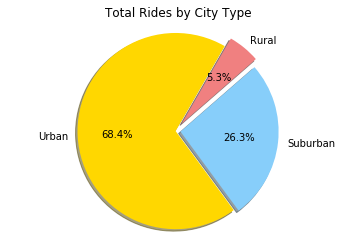

In [13]:
plt.pie(totrides_citytype, explode=explode, labels=citylabels, colors=colors,
        autopct="%1.1f%%",startangle=60, shadow=True)
plt.axis("equal")
plt.title("Total Rides by City Type")
plt.show()

# TOTAL DRIVERS BY CITY TYPE

In [14]:
#calculate total drivers of all rides
totdrivers = citynride['driver_count'].sum()

#calculate driver percentage by city type
totd1 = (urban['driver_count'].sum()/totdrivers)*100
totd2 = (suburban['driver_count'].sum()/totdrivers)*100
totd3 = (rural['driver_count'].sum()/totdrivers)*100

#values for chart
totdriver_citytype = [totd1,totd2,totd3]

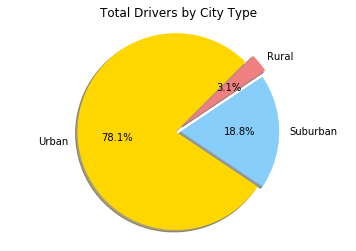

In [15]:
plt.pie(totdriver_citytype, explode=explode, labels=citylabels, colors=colors,
        autopct="%1.1f%%", startangle=45, shadow=True)
plt.axis("equal")
plt.title("Total Drivers by City Type")
plt.show()